<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning/blob/activity-5/activity_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O conjunto de dados analisados é sobre Consumo de Cerveja em São Paulo
https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [100]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [120]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [102]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/Consumo_cerveja.csv', decimal=',')
dados.head()

,date,average_temperature,minimum_temperature,maxima_temperature,precipitation,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900


In [103]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [104]:
#limpeza dos dados
dados = dados.drop(columns=['date'])

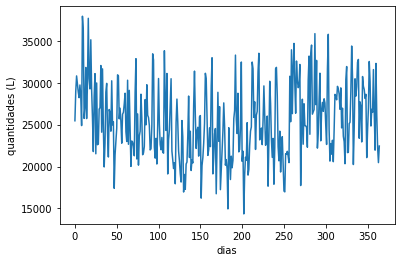

In [105]:
#plotando quantidade de consumo por dia
plt.plot(dados.beer_consumption)
plt.xlabel('dias')
plt.ylabel('quantidades (L)')
plt.show()

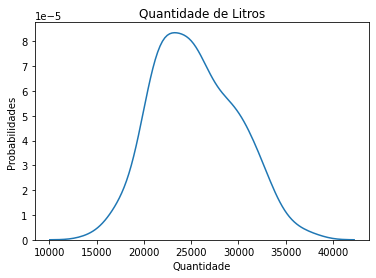

In [106]:
# distribuição de probabilidade
sns.distplot(dados.beer_consumption, hist=False, rug=False)
plt.xlabel('Quantidade')
plt.ylabel('Probabilidades')
plt.title('Quantidade de Litros')

plt.show()

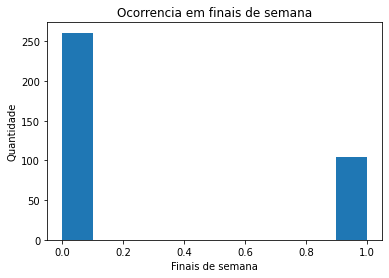

In [107]:
#plotando ocorrência em finais de semana, podemos perceber que de acordo com o analisado tem ocorrência maior durante a semana. 
plt.hist(dados.weekend)
plt.xlabel('Finais de semana')
plt.ylabel('Quantidade')
plt.title('Ocorrencia em finais de semana')
plt.show()

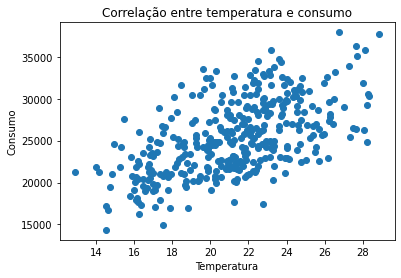

In [108]:
# plotando correlação entre temperatura e consumo 
plt.scatter(dados.average_temperature,dados.beer_consumption)
plt.xlabel('Temperatura')
plt.ylabel('Consumo')
plt.title('Correlação entre temperatura e consumo')
plt.show()

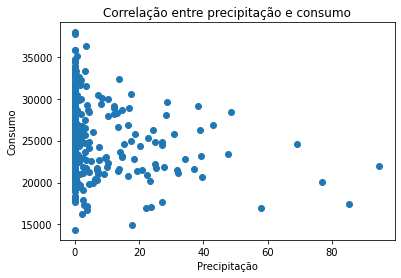

In [109]:
# plotando correlação entre precipitação e consumo - é possível perceber que quanto menos preciptação maior é o consumo , ou seja, em dias menos chuvosos tem mais consumo. 
plt.scatter(dados.precipitation,dados.beer_consumption)
plt.xlabel('Precipitação')
plt.ylabel('Consumo')
plt.title('Correlação entre precipitação e consumo')
plt.show()

In [110]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.drop(columns=['beer_consumption'])
X.head()

,average_temperature,minimum_temperature,maxima_temperature,precipitation,weekend
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


In [111]:
y = dados.beer_consumption
y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: beer_consumption, dtype: int64

In [112]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   average_temperature  365 non-null    float64
 1   minimum_temperature  365 non-null    float64
 2   maxima_temperature   365 non-null    float64
 3   precipitation        365 non-null    float64
 4   weekend              365 non-null    int64  
 5   beer_consumption     365 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 20.0 KB


In [113]:
#re-escala de dados
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,average_temperature,minimum_temperature,maxima_temperature,precipitation,weekend,beer_consumption
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979


In [115]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.drop(columns=['beer_consumption'])
X.head()

,average_temperature,minimum_temperature,maxima_temperature,precipitation,weekend
0,0.902256,0.956835,0.818182,0.000000,0.0
1,0.884712,1.000000,0.863636,0.000000,0.0
2,0.746867,0.848921,0.700000,0.000000,1.0
3,0.694236,0.784173,0.640909,0.012658,1.0
4,0.684211,0.748201,0.627273,0.000000,0.0


In [116]:
y = dados.beer_consumption
y.head()

0    0.471221
1    0.620031
2    0.698101
3    0.655082
4    0.616979
Name: beer_consumption, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [125]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

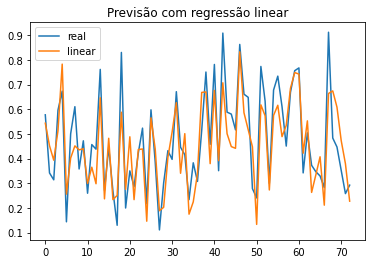

In [168]:
#plotando resultados da regressão linear
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [127]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

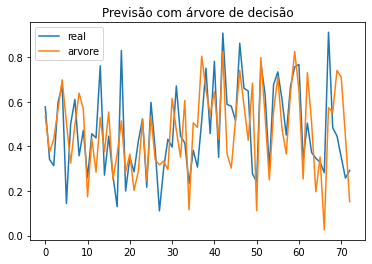

In [128]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [129]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

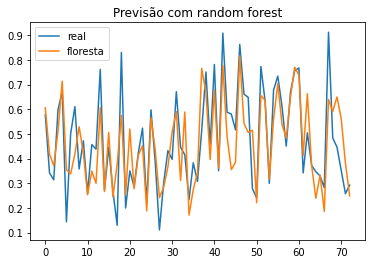

In [130]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [166]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=500)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

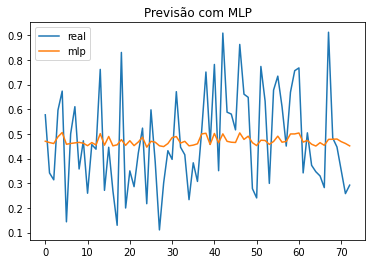

In [167]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

**A MLP teve o pior resultado comparado aos outros modelos, mesmo tentando ajustar não tive resultados bons.**



Avaliando Modelos

  *Mean* Absolute Error (MAE)

In [133]:
from sklearn.metrics import mean_absolute_error

In [134]:
#MAE regressão linear
mean_absolute_error(y_test,pred_linear)

0.08992371846967585

In [135]:
#MAE Árvore
mean_absolute_error(y_test,pred_arvore)

0.13347629592385338

In [136]:
#MAE Random Forest
mean_absolute_error(y_test,pred_floresta)

0.0949100721581067

In [137]:
#MAE MLP
mean_absolute_error(y_test,pred_mlp)

0.17452576483687327

*Mean Squared Error (MSE)*

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
#MSE regressão linear
mean_squared_error(y_test,pred_linear)

0.010760549862045497

In [140]:
#MSE Árvore
mean_squared_error(y_test,pred_arvore)

0.027046111268873192

In [141]:
#MSE Random Forest
mean_squared_error(y_test,pred_floresta)

0.014236462043563665

In [142]:
#MSE MLP
mean_squared_error(y_test,pred_mlp)

0.04073614731302125

*Root Mean Squared Error (RMSE)*

In [143]:
#RMSE regressão linear
mean_squared_error(y_test,pred_linear)**(1/2)

0.10373307024303048

In [144]:
#RMSE Árvore
mean_squared_error(y_test,pred_arvore)**(1/2)

0.16445701951839328

In [145]:
#RMSE Random Forest
mean_squared_error(y_test,pred_arvore)**(1/2)

0.16445701951839328

In [146]:
#RMSE MLP
mean_squared_error(y_test,pred_mlp)**(1/2)

0.2018319779247611

*Mean Absolute Percentage Error (MAPE)*

In [147]:

def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [148]:
#MAPE regressão linear
mean_absolute_percentage_error(y_test,pred_linear)


0.22620201489948485

In [149]:
#MAPE Árvore
mean_absolute_percentage_error(y_test,pred_arvore)

0.37255211923814335

In [169]:
#MAPE Radmon Florest
mean_absolute_percentage_error(y_test,pred_floresta)

0.25133133421368226

In [151]:
#MAPE MLP
mean_absolute_percentage_error(y_test,pred_mlp)

0.5375583137358797

**Analisando foi possível confirmar o que as imagens nos gráficos mostram, porém de foram númerica, na qual os resultados formam bons com esse dataset usando os modelos de regressão linear e a random forest, e teve o pior resultado com MLP.**